In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
data = pd.read_csv('Maternal Health.csv')

In [147]:
df = pd.DataFrame(data)

In [148]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [150]:
import seaborn as sns

In [151]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [152]:
X,y

(      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
 0      25         130           80  15.0      98.0         86
 1      35         140           90  13.0      98.0         70
 2      29          90           70   8.0     100.0         80
 3      30         140           85   7.0      98.0         70
 4      35         120           60   6.1      98.0         76
 ...   ...         ...          ...   ...       ...        ...
 1009   22         120           60  15.0      98.0         80
 1010   55         120           90  18.0      98.0         60
 1011   35          85           60  19.0      98.0         86
 1012   43         120           90  18.0      98.0         70
 1013   32         120           65   6.0     101.0         76
 
 [1014 rows x 6 columns],
 0       high risk
 1       high risk
 2       high risk
 3       high risk
 4        low risk
           ...    
 1009    high risk
 1010    high risk
 1011    high risk
 1012    high risk
 1013     mid risk
 Name: 

In [153]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
## Post Pruning
treeclassifier=DecisionTreeClassifier()

In [156]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
X_train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
302,48,120,80,11.0,98.0,88
567,23,120,80,7.5,98.0,70
987,17,90,63,8.0,101.0,70
885,23,90,60,6.8,98.0,76
655,48,120,80,11.0,98.0,88


[Text(0.6965123859191655, 0.975, 'X[3] <= 7.95\ngini = 0.657\nsamples = 679\nvalue = [187, 278, 214]'),
 Text(0.4973272490221643, 0.925, 'X[1] <= 132.5\ngini = 0.565\nsamples = 498\nvalue = [49, 273, 176]'),
 Text(0.3829204693611473, 0.875, 'X[3] <= 7.055\ngini = 0.527\nsamples = 472\nvalue = [25, 273, 174]'),
 Text(0.17913950456323338, 0.825, 'X[4] <= 99.5\ngini = 0.546\nsamples = 255\nvalue = [13, 115, 127]'),
 Text(0.11342894393741851, 0.775, 'X[1] <= 125.0\ngini = 0.517\nsamples = 204\nvalue = [4, 106, 94]'),
 Text(0.10508474576271186, 0.725, 'X[3] <= 6.75\ngini = 0.512\nsamples = 192\nvalue = [4, 106, 82]'),
 Text(0.07379400260756193, 0.675, 'X[2] <= 75.0\ngini = 0.371\nsamples = 61\nvalue = [0, 46, 15]'),
 Text(0.06544980443285528, 0.625, 'X[0] <= 27.0\ngini = 0.454\nsamples = 43\nvalue = [0, 28, 15]'),
 Text(0.04458930899608866, 0.575, 'X[5] <= 73.0\ngini = 0.287\nsamples = 23\nvalue = [0, 19, 4]'),
 Text(0.03624511082138201, 0.525, 'X[0] <= 18.0\ngini = 0.444\nsamples = 6\nvalu

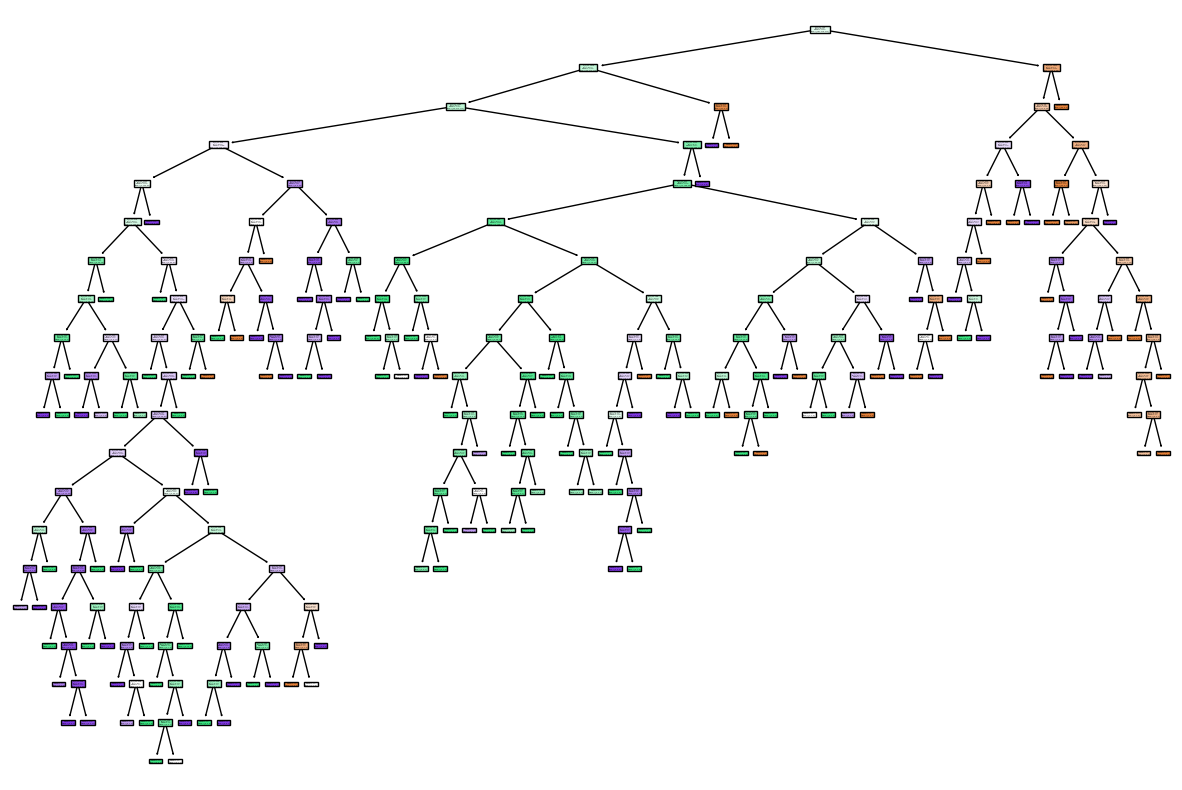

In [158]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [172]:
## Post Pruning with max_depth =2
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=27)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=27)

[Text(0.763765625, 0.9761904761904762, 'X[3] <= 7.95\nentropy = 1.565\nsamples = 679\nvalue = [187, 278, 214]'),
 Text(0.60753125, 0.9285714285714286, 'X[1] <= 132.5\nentropy = 1.335\nsamples = 498\nvalue = [49, 273, 176]'),
 Text(0.4920625, 0.8809523809523809, 'X[4] <= 99.5\nentropy = 1.212\nsamples = 472\nvalue = [25, 273, 174]'),
 Text(0.285125, 0.8333333333333334, 'X[1] <= 125.0\nentropy = 1.027\nsamples = 375\nvalue = [6, 244, 125]'),
 Text(0.277125, 0.7857142857142857, 'X[3] <= 7.005\nentropy = 0.991\nsamples = 355\nvalue = [6, 244, 105]'),
 Text(0.12625, 0.7380952380952381, 'X[3] <= 6.75\nentropy = 1.116\nsamples = 190\nvalue = [4, 104, 82]'),
 Text(0.048, 0.6904761904761905, 'X[2] <= 75.0\nentropy = 0.805\nsamples = 61\nvalue = [0, 46, 15]'),
 Text(0.04, 0.6428571428571429, 'X[0] <= 27.0\nentropy = 0.933\nsamples = 43\nvalue = [0, 28, 15]'),
 Text(0.024, 0.5952380952380952, 'X[5] <= 73.0\nentropy = 0.667\nsamples = 23\nvalue = [0, 19, 4]'),
 Text(0.016, 0.5476190476190477, 'X[0

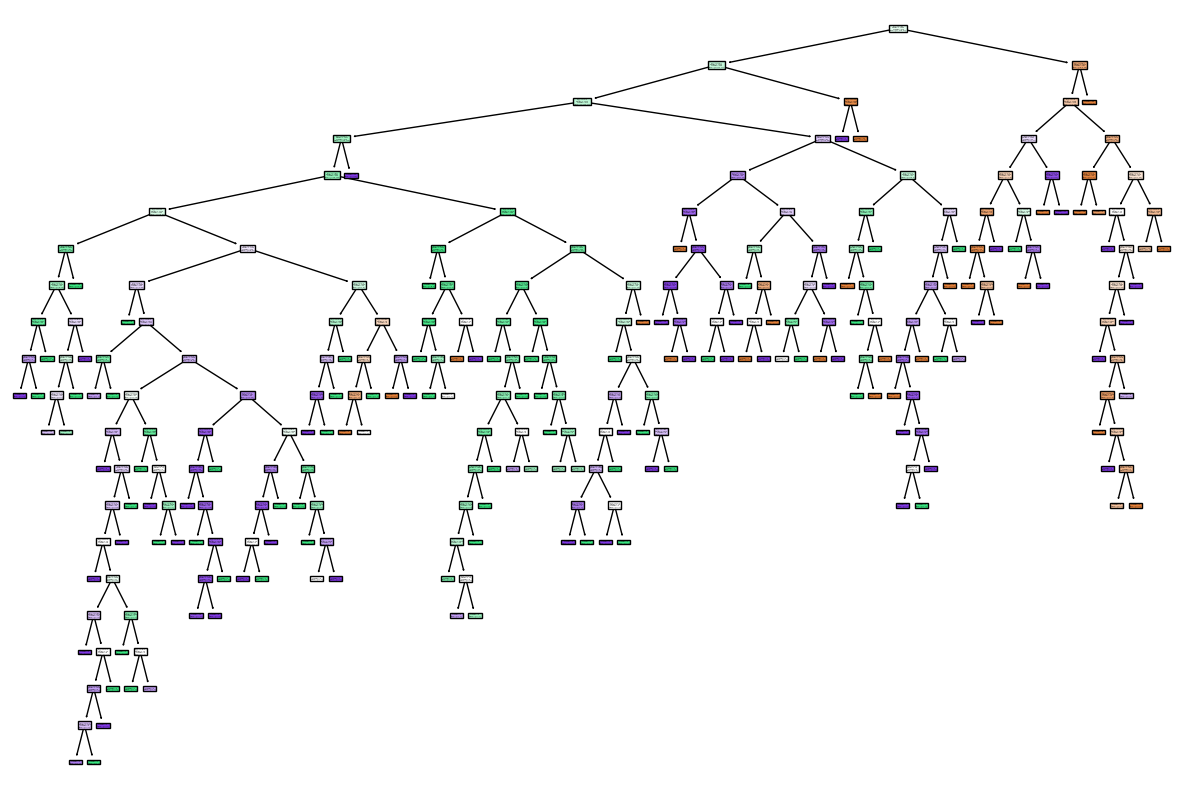

In [173]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [174]:
## prediction
y_pred=treeclassifier.predict(X_test)

In [175]:
y_pred

array(['mid risk', 'high risk', 'high risk', 'low risk', 'low risk',
       'mid risk', 'mid risk', 'mid risk', 'mid risk', 'low risk',
       'high risk', 'mid risk', 'mid risk', 'high risk', 'mid risk',
       'mid risk', 'high risk', 'low risk', 'low risk', 'mid risk',
       'mid risk', 'mid risk', 'high risk', 'high risk', 'low risk',
       'mid risk', 'high risk', 'mid risk', 'mid risk', 'low risk',
       'mid risk', 'high risk', 'low risk', 'mid risk', 'low risk',
       'high risk', 'high risk', 'mid risk', 'low risk', 'high risk',
       'high risk', 'low risk', 'high risk', 'high risk', 'low risk',
       'mid risk', 'high risk', 'mid risk', 'low risk', 'low risk',
       'mid risk', 'low risk', 'low risk', 'mid risk', 'mid risk',
       'mid risk', 'high risk', 'low risk', 'low risk', 'mid risk',
       'low risk', 'mid risk', 'mid risk', 'mid risk', 'low risk',
       'high risk', 'mid risk', 'high risk', 'mid risk', 'high risk',
       'high risk', 'high risk', 'mid risk

In [176]:

from sklearn.metrics import accuracy_score,classification_report

In [177]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7910447761194029
              precision    recall  f1-score   support

   high risk       0.91      0.84      0.87        92
    low risk       0.73      0.82      0.78       114
    mid risk       0.77      0.73      0.75       129

    accuracy                           0.79       335
   macro avg       0.80      0.80      0.80       335
weighted avg       0.80      0.79      0.79       335



In [178]:
import warnings
warnings.filterwarnings('ignore')

In [230]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [233]:
## Train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [234]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [235]:
y_pred=clf.predict(X_test)

In [236]:
score=accuracy_score(y_pred,y_test)

In [237]:
score

0.746268656716418

In [239]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   high risk       0.89      0.75      0.82       101
    low risk       0.72      0.75      0.74       122
    mid risk       0.67      0.73      0.70       112

    accuracy                           0.75       335
   macro avg       0.76      0.75      0.75       335
weighted avg       0.76      0.75      0.75       335

